In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
import configparser
from sqlalchemy import create_engine  
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

#Модели регрессии

#Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
#Stochastic Gradient Descent Regression
from sklearn.linear_model import SGDRegressor
#Support Vector Machine
from sklearn.svm import SVR
#Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge
#CatBoost Regressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
#Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge
#Linear Regression
from sklearn.linear_model import LinearRegression
#Ridge and Lasso regression
#XGBoost Regressor
from xgboost import XGBRegressor
#LGBM Regressor
#from lightgbm import LGBMRegressor

# Подбор гиперпараметров
import datetime
from sklearn.metrics import accuracy_score

import pickle
%matplotlib inline



In [9]:
#Ставим кол-во выводимых строк и столбцов 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

#Отключаем предупреждения

warnings.filterwarnings('ignore')

In [12]:
data_path = '/home/aleksey/Classical_ML/Loan_Approval_Prediction/data_files/train.csv'

In [13]:
with open(data_path) as f:
    df = pd.read_csv(f)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [15]:
df.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [17]:
''' Проверка на дубли '''

df[df.duplicated()]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [20]:
'''Визуализация'''

def overall_viz(data_frame,cols,cell):

    heart_CAT = data_frame.columns.to_list()

#  Categorical Data

    b = cols  # number of columns
    a = math.ceil(len(heart_CAT)/b)*3  # number of rows
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (20,200))



    for i in heart_CAT:
        
        if data_frame[i].dtype in ['float64','int64']:
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.boxplot(data = data_frame, x = i)
            c = c + 1
    
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.histplot(data = data_frame, x = i)
            c = c + 1
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.scatterplot(data=data_frame, x=cell, y=i)
            c = c + 1
        
        elif data_frame[i].dtype in ['object']:
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.countplot(data = data_frame, x = i)
            c = c + 1
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.histplot(data = data_frame, x = i)
            c = c + 1
            
            plt.subplot(a, b, c)
            plt.xlabel(i)
            sns.scatterplot(data=data_frame, x=cell, y=i)
            c = c + 1
        
        
#QQ Plot    
#    plt.subplot(a, b, c)
#    plt.xlabel(i)
#    pplot(data = after_drops_numeric,x = i,kind='qq')
#    c = c + 1

    fig.tight_layout(h_pad=2,w_pad=2)
    
    plt.show()

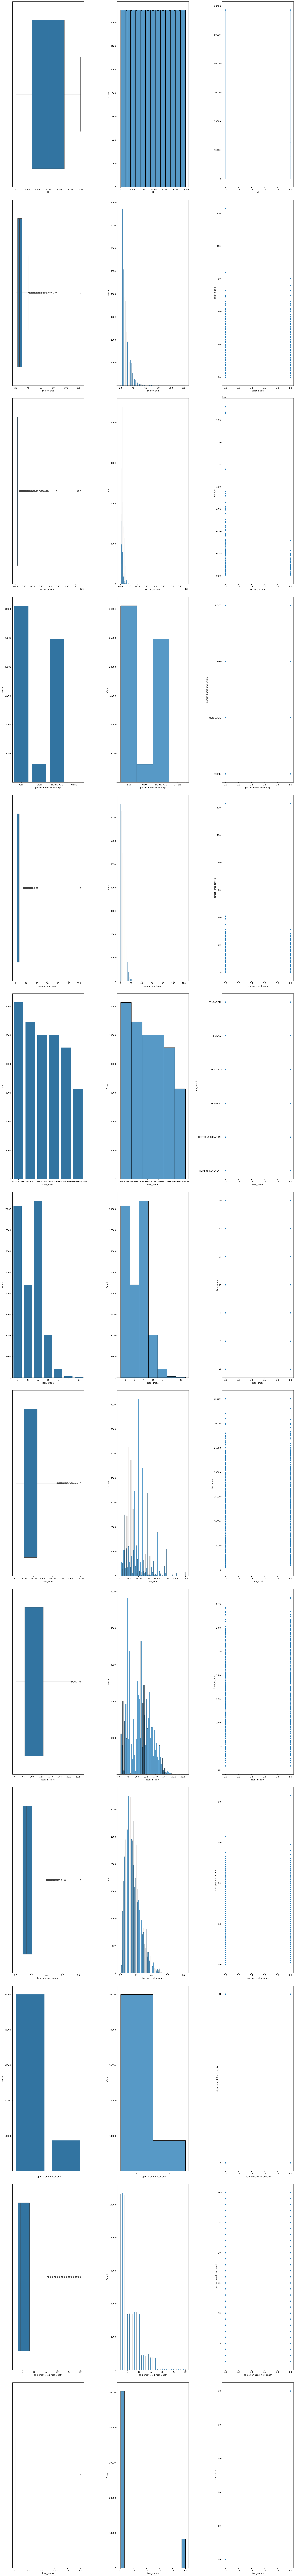

In [21]:
overall_viz(df,3,'loan_status')

In [26]:
'''Дропним человека у которого большой возраст'''

df.drop(index = df[df['person_age']>100].index,inplace = True)

In [32]:
'''Дропним у кого большой доход'''

df.drop(index = df[df['person_income'] > 1700000].index.to_list(),inplace =True)
        

In [33]:
df[df['person_income'] > 1700000]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


In [37]:
'''Очень мало клиентов со статусом 1, дисбаланс классов'''

df['loan_status'].value_counts()

loan_status
0    50291
1     8350
Name: count, dtype: int64

In [39]:
''' Не вдаваясь в подробности дисбаланса и переменных обучим Catboost '''

catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6,10]
         }


In [50]:
catboost_features = df.select_dtypes(include='object').columns.to_list()

In [54]:
catboost_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [55]:
model = CatBoostClassifier(cat_features=catboost_features)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [45]:
X_Train = df.loc[:,:'cb_person_cred_hist_length']
Y_Train = df['loan_status']

In [58]:

grid_search = GridSearchCV(model, param_grid = catboost_params, cv =folds, scoring = 'accuracy')
grid_search.fit(X_Train, Y_Train)

0:	learn: 0.6863315	total: 3.12ms	remaining: 309ms
1:	learn: 0.6795720	total: 6.07ms	remaining: 297ms
2:	learn: 0.6729449	total: 8.3ms	remaining: 268ms
3:	learn: 0.6665398	total: 10.9ms	remaining: 261ms
4:	learn: 0.6602548	total: 13.1ms	remaining: 248ms
5:	learn: 0.6541274	total: 15.2ms	remaining: 238ms
6:	learn: 0.6480213	total: 17.2ms	remaining: 229ms
7:	learn: 0.6420585	total: 19ms	remaining: 219ms
8:	learn: 0.6361420	total: 21.2ms	remaining: 215ms
9:	learn: 0.6303616	total: 23.7ms	remaining: 214ms
10:	learn: 0.6247581	total: 25.8ms	remaining: 208ms
11:	learn: 0.6192425	total: 27.7ms	remaining: 203ms
12:	learn: 0.6138329	total: 29.5ms	remaining: 197ms
13:	learn: 0.6084769	total: 31.5ms	remaining: 193ms
14:	learn: 0.6031635	total: 33.4ms	remaining: 189ms
15:	learn: 0.5980701	total: 35.5ms	remaining: 186ms
16:	learn: 0.5930376	total: 37.5ms	remaining: 183ms
17:	learn: 0.5880642	total: 39.4ms	remaining: 180ms
18:	learn: 0.5831882	total: 41.3ms	remaining: 176ms
19:	learn: 0.5783683	tota

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7621b0e207d0>,
             param_grid={'depth': [3, 6, 10], 'iterations': [100, 200],
                         'learning_rate': [0.01, 0.1]},
             scoring='accuracy')

In [60]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.897638,0.051413,0.008481,0.000435,6,200,0.1,"{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}",0.953449,0.952251,0.952592,0.954212,0.952848,0.953070,0.000692,1
11,5.059703,0.151202,0.009740,0.000490,10,200,0.1,"{'depth': 10, 'iterations': 200, 'learning_rate': 0.1}",0.952511,0.952422,0.952592,0.954212,0.952166,0.952780,0.000730,2
3,1.249126,0.012172,0.008854,0.000770,3,200,0.1,"{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}",0.953022,0.951484,0.952336,0.953104,0.951910,0.952371,0.000626,3
9,0.930124,0.015863,0.008247,0.000632,10,100,0.1,"{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}",0.952340,0.951484,0.951995,0.952422,0.951825,0.952013,0.000344,4
5,0.342168,0.009806,0.007961,0.000319,6,100,0.1,"{'depth': 6, 'iterations': 100, 'learning_rate': 0.1}",0.952767,0.949437,0.952080,0.953359,0.952166,0.951962,0.001344,5
10,4.724674,0.096319,0.009205,0.000666,10,200,0.01,"{'depth': 10, 'iterations': 200, 'learning_rate': 0.01}",0.951317,0.949267,0.950290,0.951654,0.949778,0.950461,0.000903,6
6,1.711042,0.025567,0.008243,0.000243,6,200,0.01,"{'depth': 6, 'iterations': 200, 'learning_rate': 0.01}",0.949697,0.946282,0.948414,0.949778,0.947647,0.948364,0.001314,7
1,0.233930,0.008266,0.007709,0.000439,3,100,0.1,"{'depth': 3, 'iterations': 100, 'learning_rate': 0.1}",0.946884,0.940143,0.946965,0.947902,0.944662,0.945311,0.002795,8
2,1.130108,0.013783,0.008004,0.000273,3,200,0.01,"{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}",0.941768,0.935113,0.943469,0.942701,0.940740,0.940758,0.002967,9
8,0.907035,0.012926,0.008204,0.000253,10,100,0.01,"{'depth': 10, 'iterations': 100, 'learning_rate': 0.01}",0.907409,0.903223,0.906122,0.908851,0.907913,0.906703,0.001950,10


In [65]:
''' Берем параметры с наивысшим ранком = 1 '''

grid_search.best_params_

{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

In [66]:
''' обучаем модель '''

catboostmodel = CatBoostClassifier(cat_features = catboost_features,**grid_search.best_params_).fit(X_Train,Y_Train)

0:	learn: 0.5749908	total: 11.2ms	remaining: 2.23s
1:	learn: 0.4860377	total: 23.2ms	remaining: 2.3s
2:	learn: 0.4190538	total: 32.9ms	remaining: 2.16s
3:	learn: 0.3724878	total: 42.5ms	remaining: 2.08s
4:	learn: 0.3364837	total: 53.3ms	remaining: 2.08s
5:	learn: 0.3043634	total: 64.4ms	remaining: 2.08s
6:	learn: 0.2792022	total: 75.5ms	remaining: 2.08s
7:	learn: 0.2600618	total: 86.6ms	remaining: 2.08s
8:	learn: 0.2456439	total: 96.4ms	remaining: 2.05s
9:	learn: 0.2338624	total: 106ms	remaining: 2.02s
10:	learn: 0.2257165	total: 117ms	remaining: 2.01s
11:	learn: 0.2177749	total: 128ms	remaining: 2s
12:	learn: 0.2118559	total: 138ms	remaining: 1.98s
13:	learn: 0.2073450	total: 147ms	remaining: 1.95s
14:	learn: 0.2034150	total: 155ms	remaining: 1.92s
15:	learn: 0.1985279	total: 165ms	remaining: 1.89s
16:	learn: 0.1945000	total: 175ms	remaining: 1.89s
17:	learn: 0.1919002	total: 185ms	remaining: 1.87s
18:	learn: 0.1896450	total: 195ms	remaining: 1.86s
19:	learn: 0.1868923	total: 208ms	re

In [68]:
test_path = '/home/aleksey/Classical_ML/Loan_Approval_Prediction/data_files/test.csv'
with open(test_path) as f:
    test_df = pd.read_csv(test_path)

In [69]:
test_df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4


In [70]:
y_pred = catboostmodel.predict_proba(test_df)

In [83]:
y_pred[:,1]

array([0.99841591, 0.01710464, 0.34202768, ..., 0.00616801, 0.11139869,
       0.95590173])

In [99]:
sub = test_df[['id']].join(pd.DataFrame(y_pred[:,1]))

In [109]:
day = str(datetime.datetime.today().date()).replace('-','_')

In [110]:
sub.to_csv(f'data_files/sub_{day}.csv')

In [72]:
submission_path = '/home/aleksey/Classical_ML/Loan_Approval_Prediction/data_files/sample_submission.csv'
with open(submission_path) as f:
    submission_df = pd.read_csv(submission_path)

In [73]:
submission_df.head(2)

,id,loan_status
0,58645,0.5
1,58646,0.5
